               GLD    GOOG     IBM     SPY
2010-12-31  138.72  593.97  142.55  122.00
2010-12-30  137.03  598.86  142.46  121.97
2010-12-29  137.71  601.00  142.32  122.16
2010-12-28  137.22  598.92  141.53  122.07
2010-12-27  135.02  602.38  141.17  121.90
Populating the interactive namespace from numpy and matplotlib


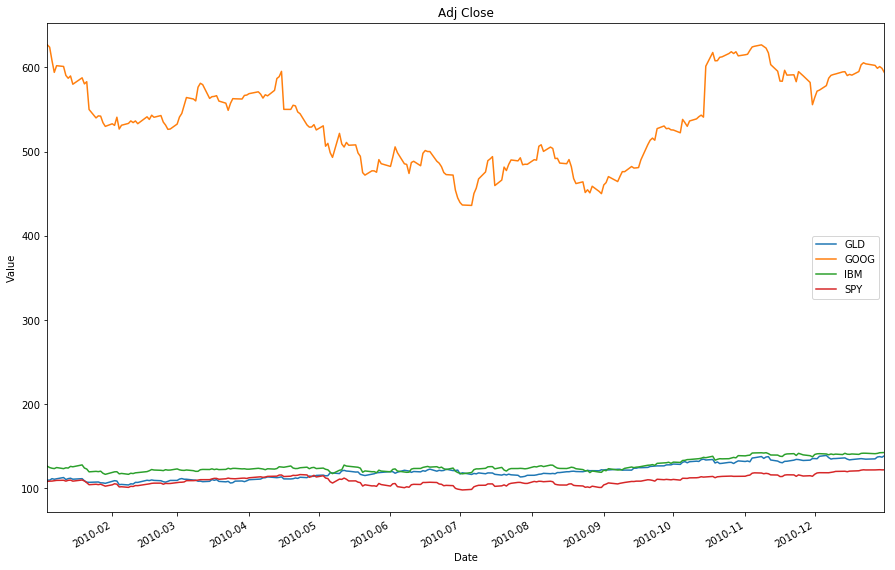

                 GLD      GOOG       IBM       SPY
2010-01-04  1.000000  1.000000  1.000000  1.000000
2010-01-05  0.999089  0.995596  0.987880  1.002678
2010-01-06  1.015574  0.970499  0.981464  1.003417
2010-01-07  1.009290  0.947906  0.978058  1.007666
2010-01-08  1.014299  0.960542  0.987880  1.010991


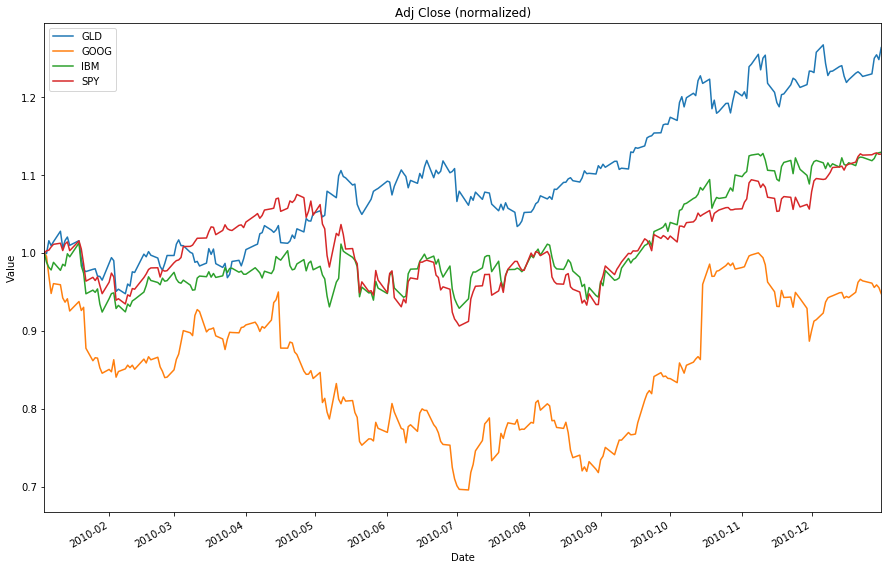

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

def getEmptyDataFrameWithRange(startDate, endDate):
    dates = pd.date_range(startDate, endDate)
    return pd.DataFrame(index=dates)

def joinSymbols(originalDataFrame, symbols, column):
    dfResult = originalDataFrame
    for symbol in symbols:
        dfSymbol = pd.read_csv('data/{}.csv'.format(symbol), index_col='Date', parse_dates=True, usecols=['Date',column], na_values=['nan'])
        dfSymbol = dfSymbol.rename(columns={column: symbol})
        # join (left join) the 2 dataframes and remove rows with NaN
        dfResult = dfResult.join(dfSymbol, how='inner').dropna()
    return dfResult

symbols = ['GLD', 'GOOG', 'IBM', 'SPY']
column  = 'Adj Close'
df = getEmptyDataFrameWithRange('2010-01-01', '2010-12-31')
df = joinSymbols(df, symbols, column)

print df.head()

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

# values plot
axes = df.plot(title=column, fontsize=10)
axes.set_xlabel('Date')
axes.set_ylabel('Value')
plt.show()

# normalization
df.sort_index(inplace=True) # sort by index columns
dfNorm = df / df.ix[0,:] # divide all rows by the first one

print dfNorm.head()

# normalized plot
axes = dfNorm.plot(title='{} (normalized)'.format(column), fontsize=10)
axes.set_xlabel('Date')
axes.set_ylabel('Value')
plt.show()